In [26]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt

In [27]:
# Start exploration of the directory structure and files
files=[]
for root, dirs, in_files in os.walk("Sample"):
    for f in in_files:
        files.append(os.path.join(root, f))


In [28]:
n = len(files)
n

5

In [44]:
gray_image0 = cv2.imread(files[0], cv2.IMREAD_UNCHANGED)
gray_image1 = cv2.imread(files[1], cv2.IMREAD_UNCHANGED)
gray_image2 = cv2.imread(files[2], cv2.IMREAD_UNCHANGED)
gray_image0.shape, gray_image1.shape, gray_image2.shape

((4584, 6441), (4597, 6393), (4280, 5916))

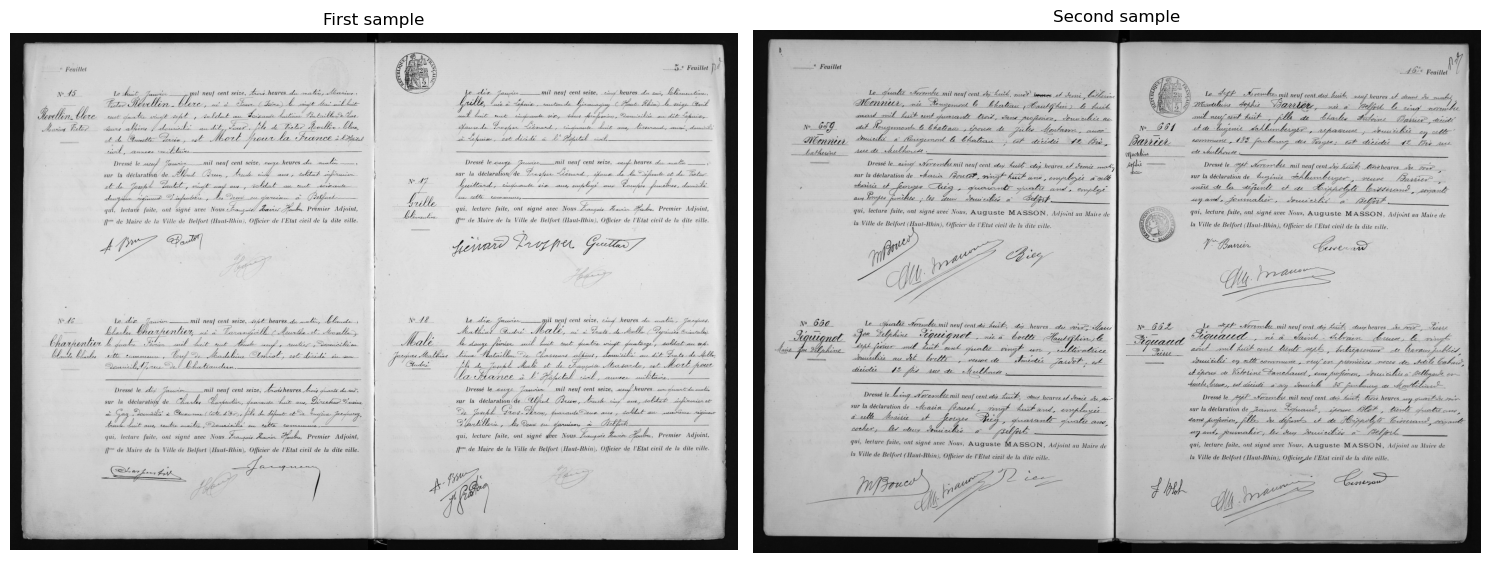

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
axes[0].imshow(gray_image0, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('First sample')
axes[0].axis('off')
    
axes[1].imshow(gray_image1, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Second sample')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [31]:
def analyze_image(image):    
    # Find the smallest and largest values for rows
    sum_rows      = np.sum(image, axis=1)  # Sum along the rows (axis=1)
    min_row_value = np.min(sum_rows)
    max_row_value = np.max(sum_rows)
    
    min_row_pos = np.argmin(sum_rows)  # Position of the smallest row sum
    max_row_pos = np.argmax(sum_rows)  # Position of the largest row sum
    
    row_ratio = min_row_value / max_row_value if max_row_value != 0 else float('inf')
    
    # Find the smallest and largest values for columns
    sum_columns   = np.sum(image, axis=0)  # Sum along the columns (axis=0)
    min_col_value = np.min(sum_columns)
    max_col_value = np.max(sum_columns)
    
    min_col_pos = np.argmin(sum_columns)  # Position of the smallest column sum
    max_col_pos = np.argmax(sum_columns)  # Position of the largest column sum
    
    col_ratio = min_col_value / max_col_value if max_col_value != 0 else float('inf')
    
    # Return the result
    result = {}

    # Compare the ratios for rows and columns to determine the direction
    if row_ratio < col_ratio:
        result['direction'] = 'horizontal'  # Rows have the better ratio
        result['min_position'] = min_row_pos
        result['max_position'] = max_row_pos
        result['min_value'] = min_row_value
        result['max_value'] = max_row_value
        result['ratio'] = row_ratio
    else:
        result['direction'] = 'vertical'  # Columns have the better ratio
        result['min_position'] = min_col_pos
        result['max_position'] = max_col_pos
        result['min_value'] = min_col_value
        result['max_value'] = max_col_value
        result['ratio'] = col_ratio

    return result


In [32]:
def split_image(image, result):
    direction = result['direction']
    
    if direction == 'horizontal':
        # Split the image along the horizontal axis (rows)
        split1 = image[:result['max_position'], :]
        split2 = image[result['max_position']:, :]
    else:
        # Split the image along the vertical axis (columns)
        split1 = image[:, :result['max_position']]
        split2 = image[:, result['max_position']:]
    
    return split1, split2

def plot_images(original, split1, split2):
    # Plot the original image and the two split images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(split1, cmap='gray')
    axes[1].set_title('Split 1')
    axes[1].axis('off')
    
    axes[2].imshow(split2, cmap='gray')
    axes[2].set_title('Split 2')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

In [33]:
# Example usage with a binary image (0 and 255)
result = analyze_image(gray_image0)
print(result)

{'direction': 'horizontal', 'min_position': 4583, 'max_position': 2215, 'min_value': 78506, 'max_value': 1383662, 'ratio': 0.05673784493611879}


In [34]:
image1, image2 = split_image(gray_image0, result)
image1.shape, image2.shape

((2215, 6441), (2369, 6441))

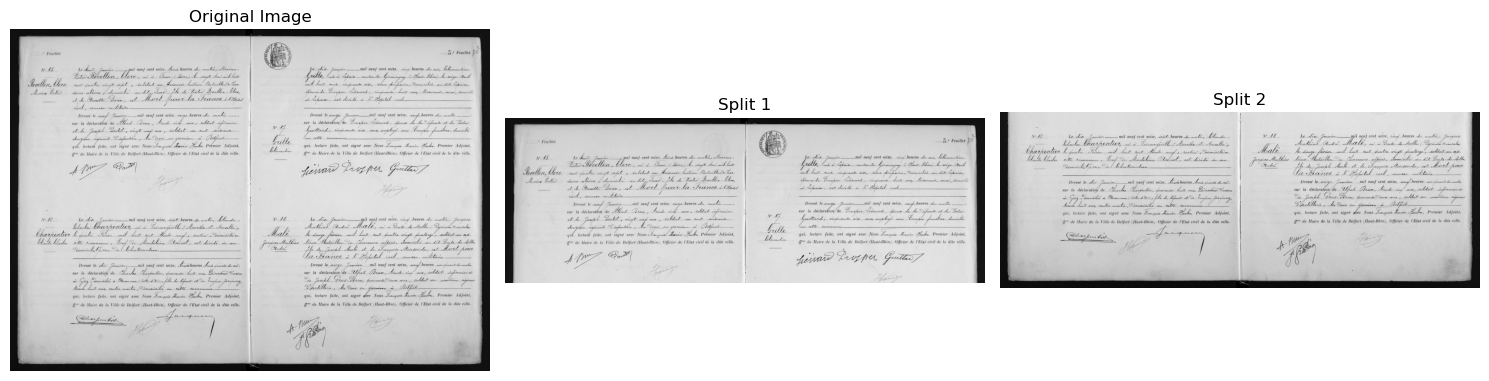

In [35]:
plot_images(gray_image0, image1, image2)

In [42]:
image1, image2 = split_image(gray_image1, result)
image1.shape, image2.shape

((2215, 6393), (2382, 6393))

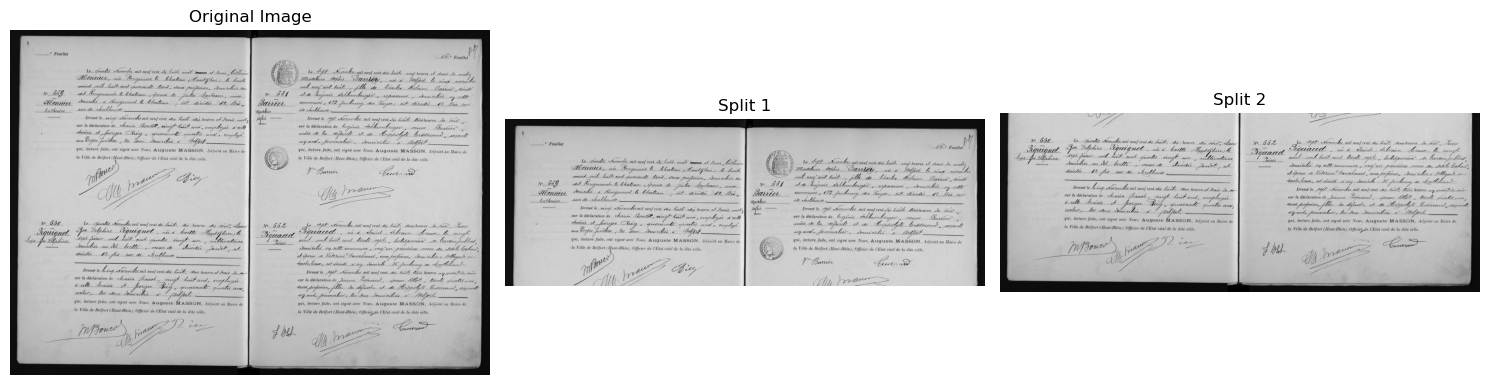

In [43]:
plot_images(gray_image1, image1, image2)

In [45]:
image1, image2 = split_image(gray_image2, result)
image1.shape, image2.shape

((2215, 5916), (2065, 5916))

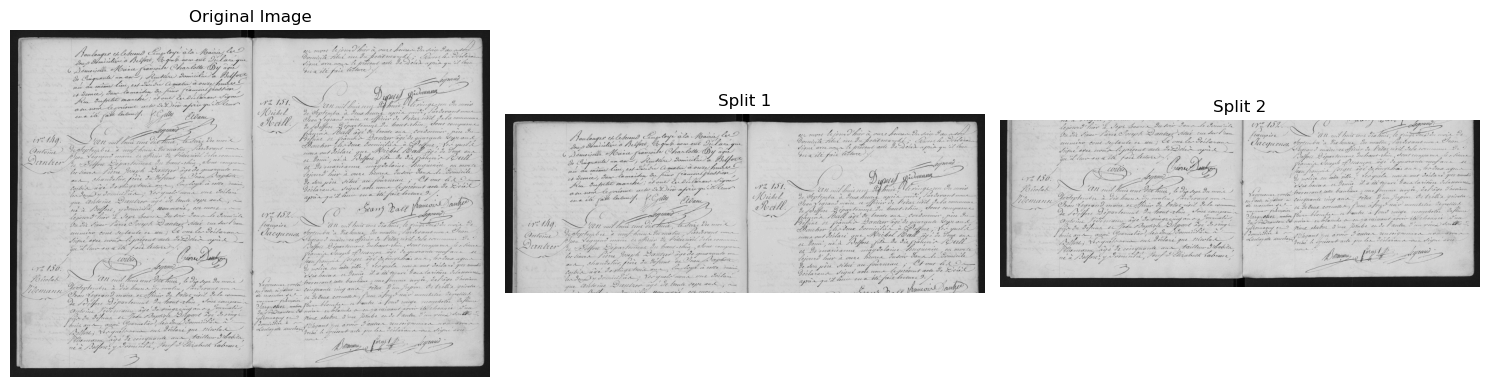

In [46]:
plot_images(gray_image2, image1, image2)